# **Clasificación de categorias de anuncios**
**Contexto**

Trovaprezzi es un sitio web y motor de búsqueda italiano que permite encontrar y comparar precios sobre miles de comercios asociados. La gran diversidad de la red hace que, de modo aún más pronunciado que en otras plataformas, las publicaciones se ingresen con títulos y descripciones muy poco estándares. Lograr que cada publicación se encuentre adecuadamente categorizada (si es un telefono celular, un silla de playa, un televisor, etc.) es un factor clave para proporcionar una adecuada experiencia para el cliente facilitando la búsqueda, el descubrimiento de productos, las recomendaciones, entre otras posibilidades.

En este desafío, se debe construir un modelo que permita clasificar automáticamente un anuncio insertado en Trovaprezzi, usando el título, la descripción y eventualmente la imagen asociada al anuncio.


**Importante**

Las predicciones que envíen deben ser reproducibles desde el código entregado en el notebook y, por lo tanto, deben depender sólo de los 3 campos identificados más arriba (título, descripción y opcionalmente la imagen). En caso de que el clasificador no sea determinista se deben fijar las semillas (seed) que permitan obtener exactamente los mismos resultados.

Solo se van a considerar predicciones con el nombre del equipo.

Para ello, un integrante debe ir a la pestaña Team y colocar en "Team Name" el nombre que inscribieron. Abajo aparece la opción de Merge Teams que les permite ingresar el resto de integrantes al equipo. Por cada integrante ingresar el nombre de usuario en "Invite another team to merge with yours" y luego clickear "Request Merge". Dicha persona deberá aceptar la solicitud. Debería llegar un correo.

`Una vez estén todos en el mismo equipo cualquier integrante puede subir una predicción en Submit Predictions`


La competencia no acepta más de 5 predicciones al día por equipo. Los intentos se reinician diariamente según el Coordinated Universal Time (UTC).
No es éticamente correcto manejar más de un perfil por equipo o usar perfiles individuales para "hacker" la restricción anterior. Encontrarán ésta en cualquier competencia de reclutamiento que les toque en el futuro.

En la sección My Submissions pueden ver el historial de intentos, opcionalmente pueden seleccionar 2 de los intentos que ustedes quieran usar en el Leaderboard. privado. Si no seleccionan nada se eligen automáticamente basándose en su mejor score del Leaderboard público.


# **Carga de datos**

In [1]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/clases-II-2021/Machine-Learning/datasets/taller01/" # Esta es la ruta
path2 = "ferramenta-competition-images/ferramenta-competition-images/ferramenta-competition-images/" # Ruta de imagenes

Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
# data path

nameTrain = "ferramenta_competition_train.csv"
nameTest = "ferramenta_competition_test_without_labels.csv"
nameSample = "sample_submission.csv"

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
df_train = pd.read_csv(path+nameTrain)
df_test = pd.read_csv(path+nameTest)
df_sample = pd.read_csv(path+nameSample)

In [5]:
print(df_train.isna().all().unique())
print(df_test.isna().all().unique())
print(df_sample.isna().all().unique())

[False]
[False]
[False]


In [6]:
df_train.head()

,image,title,description,class,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,...,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255
0,181587231.jpg,record irwin irwin record 96 morsa da banco pe...,irwin record 96 morsa da banco per tubi 3 152 mm,_@morsetto_strettoio_,0.000000,0.000000,0.000000,0.254326,0.000000,0.247400,0.000000,0.039258,0.578160,0.0,0.00000,0.000000,0.000000,0.0,0.000000,1.196226,0.0,0.347120,0.893756,0.107661,0.120584,0.619810,0.775081,0.237588,0.480812,0.092190,0.585013,0.260801,0.0,0.051128,0.408755,0.0,0.008246,0.000000,0.895943,0.000000,...,0.180205,0.292480,0.0,0.000000,0.377168,0.495082,0.000000,0.0,0.819566,0.587949,0.306579,0.625850,0.0,0.000000,0.892972,0.457109,0.877249,0.000000,0.0,0.112500,0.000000,0.000000,0.682221,0.604566,0.000000,0.031261,0.160201,0.516720,0.667781,0.128813,0.237102,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.063287,0.000000
1,200447756.jpg,italchimica base tintometro x smalto fer plenu...,sistema tintometrico base per smalto antiruggi...,_@vernice_,0.420585,0.000000,0.000000,0.454027,0.000000,0.796165,0.015496,0.000000,0.122843,0.0,0.00000,0.232738,0.230362,0.0,0.000000,0.573399,0.0,0.375044,1.059744,0.187541,0.549539,0.374479,0.117968,0.003436,0.687855,0.000000,0.324851,0.130692,0.0,0.775700,0.380714,0.0,0.000000,0.000000,1.012925,0.519390,...,0.085027,0.087495,0.0,0.000000,0.197663,0.649096,0.000000,0.0,0.299882,0.397917,0.360671,1.054911,0.0,0.000000,0.678310,0.257860,0.551309,0.193663,0.0,0.504867,0.000000,0.000000,0.542428,0.000000,0.217511,0.000000,0.090439,0.488979,0.755477,0.505257,0.586435,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,160784717.jpg,maurer cerniera per mobili perno fisso art 500...,confezione 4 pzmisura 1 3 4misura 2 20x20 mm. ...,_@cerniera_bandella_,0.105055,0.512814,0.000000,0.309017,0.000000,0.519669,0.000000,0.000000,0.443095,0.0,0.02043,0.000000,0.000000,0.0,0.000000,0.328891,0.0,0.346205,1.448922,0.000000,0.332051,0.132104,0.285849,0.637295,0.709344,0.000000,0.595629,0.000000,0.0,0.141472,0.000000,0.0,0.000000,0.000000,0.528764,0.160127,...,0.022388,0.000000,0.0,0.000000,0.733194,0.814695,0.000000,0.0,0.576185,0.719151,0.477687,1.019373,0.0,0.000000,0.505605,0.204111,1.078165,0.000000,0.0,0.000000,0.213909,0.110369,0.834945,0.000000,0.206743,0.136458,0.000000,0.132498,0.356487,0.419246,0.565308,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.617254,0.000000
3,115047083.jpg,sanifri 470018043 connettori ad angolo zincati...,sanifri 470018043 connettori ad angolo zincati...,_@staffa_squadretta_,0.052270,0.000000,0.000000,0.006339,0.000000,0.204171,0.434331,0.000000,0.439615,0.0,0.00000,0.039426,0.000000,0.0,0.275153,0.490338,0.0,0.124367,1.412030,0.011064,0.336450,0.192238,0.349319,0.404078,0.498563,0.077804,0.906431,0.507788,0.0,0.461764,0.000000,0.0,0.000000,0.000000,1.180548,0.000000,...,0.000000,0.171111,0.0,0.000000,0.595918,0.545273,0.000000,0.0,0.342300,0.901514,0.653951,0.546019,0.0,0.092263,0.824342,0.329975,0.674738,0.000000,0.0,0.174564,0.227789,0.000000,0.386442,0.000000,0.000000,0.148257,0.169733,0.438215,0.000000,0.000000,0.000000,0.223212,0.0,0.0,0.0,0.0,0.0,0.0,0.019491,0.000000
4,171654232.jpg,weller 2020 saldatore elettrico per ferro 20 w...,weller 2020 saldatore elettrico per ferro 20 w...,_@accessori_saldatore_,0.481601,0.500977,0.133263,0.558505,0.042294,0.000000,0.049805,0.000000,0.284956,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.077343,0.0,0.386074,1.529590,0.121066,0.236316,0.000000,0.591344,0.259437,0.356270,0.000000,0.523772,0.169259,0.0,0.000000,0.000000,0.0,0.152869,0.085487,0.952200,0.244196,...,0.098452,0.000000,0.0,0.153734,0.704994,1.118472,0.084447,0.0,0.573938,0.456719,0.000000,0.175883,0.0,0.000000,0.461596,0.328040,0.686096,0.000000,0.0,0.038806,0.000000,0.000000,0.273832,0.501539,0.284877

In [7]:
df_test.head()

,image,title,description,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,...,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255
0,193298868.jpg,durlach magnat plus morsa da banco con mds 160...,durlach magnat plus morsa da banco con mds 160...,0.084366,0.132483,0.000000,0.616159,0.0,0.358702,0.033038,0.00000,0.680323,0.0,0.000000,0.000000,0.0,0.0,0.0,0.428513,0.0,0.436265,0.950636,0.000000,0.228387,0.000000,0.189353,0.434081,0.571047,0.000000,0.421557,0.335947,0.0,0.000000,0.337944,0.0,0.0,0.000000,0.666920,0.000000,0.0,...,0.071825,0.000000,0.000000,0.0,0.793235,1.045893,0.00000,0.0,0.434586,0.855759,0.000000,0.532302,0.0,0.0,0.693572,0.000000,1.384848,0.0,0.0,0.113462,0.000000,0.000000,0.669779,0.399739,0.223165,0.006210,0.150291,0.647014,0.460184,0.476443,0.249871,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.258719,0.000000
1,180043630.jpg,sicutool morse da banco universali e per insta...,largh. ganasce mm 160 apertura mm 225 alt. fr...,0.000000,0.000000,0.198770,0.908536,0.0,0.123547,0.000000,0.00000,0.872002,0.0,0.000000,0.686689,0.0,0.0,0.0,0.168953,0.0,0.444685,1.089771,0.092668,0.255528,0.000000,0.734944,0.100475,0.658690,0.000000,0.616996,1.311054,0.0,0.415126,0.024407,0.0,0.0,0.000000,1.412179,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.920062,0.490969,0.00000,0.0,0.371266,0.822199,0.000000,0.580381,0.0,0.0,0.958482,0.106509,1.488676,0.0,0.0,0.000000,0.369259,0.000000,0.782168,0.590222,0.572960,0.124556,0.114640,0.842181,1.212312,0.000000,0.337951,0.0,0.0,0.0,0.195993,0.0,0.00000,0.003187,0.147880,0.148991
2,180043573.jpg,sicutool morse da banco 2854 80,largh. ganasce mm 80 apertura max mm 105 peso...,0.011956,0.000000,0.000000,0.457699,0.0,0.141502,0.000000,0.12656,0.469594,0.0,0.037151,0.237810,0.0,0.0,0.0,0.517180,0.0,0.598957,1.039781,0.054868,0.112358,0.070034,0.553029,0.132452,0.310749,0.000000,0.358245,0.817564,0.0,0.000000,0.092601,0.0,0.0,0.000000,1.295072,0.049519,0.0,...,0.223524,0.000000,0.295137,0.0,0.481772,1.108684,0.00000,0.0,0.450969,0.611103,0.000000,0.461462,0.0,0.0,0.433281,0.145672,1.010143,0.0,0.0,0.000000,0.000000,0.199509,0.624773,0.560047,0.340297,0.268552,0.000000,0.497321,0.444462,0.000000,0.388767,0.0,0.0,0.0,0.000000,0.0,0.00000,0.084646,0.000000,0.129974
3,199501868.jpg,cassa sovrapponibile norma europa 130 lt base ...,contenitori sovrapponibili norma europa realiz...,0.174531,0.123338,0.005443,0.593127,0.0,0.036032,0.378701,0.00000,0.416917,0.0,0.000000,0.000000,0.0,0.0,0.0,0.746301,0.0,0.329824,1.170303,0.000000,0.157979,0.426727,0.476844,0.275922,0.676764,0.014501,1.076584,0.211804,0.0,0.154316,0.000000,0.0,0.0,0.000000,1.116516,0.156692,0.0,...,0.276788,0.069651,0.000000,0.0,0.351217,0.646533,0.02538,0.0,0.577320,0.568385,0.000000,0.815473,0.0,0.0,0.996224,0.303338,0.880762,0.0,0.0,0.075085,0.148517,0.000000,0.383728,0.005046,0.000000,0.000000,0.000000,0.754065,0.124804,0.094594,0.000000,0.0,0.0,0.0,0.000000,0.0,0.17182,0.000000,0.000000,0.000000
4,147033432.jpg,stanley set di pennelli per decorare 5 pz. 0 2...,stanley set di pennelli per decorare 5 pz. 0 2...,0.350889,0.000000,0.000000,0.721987,0.0,0.254078,0.299150,0.00000,0.131891,0.0,0.000000,0.089366,0.0,0.0,0.0,0.491465,0.0,0.416190,0.983460,0.000000,0.241045,0.234922,0.345215,0.031265,0.276657,0.000000,0.466795,0.038548,0.0,0.105662,0.399373,0.0,0.0,0.053702,0.665270,0.000000,0.0,...,0.699652,0.000000,0.000000,0.0,0.702536,0.869420,0.00000,0.0,0.524548,0.728517,0.059257,0.482354,0.0,0.0,0.542604,0.501970,1.192820,0.0,0.0,0.000000,0.000000,0.043585,0.422025,0.216872,0.230652,0.304099,0.000000,0.400090,0.977819,0.000000,0.445638,0.0,0.0,0.0,0.000000,0.0,0.00565,0.000000,0.030347,0.000000


# **Vectorización**

In [8]:
X_train=df_train.loc[:, df_train.columns[4:]]


In [9]:
y_train=df_train['class']
y_train

0        _@morsetto_strettoio_
1                   _@vernice_
2         _@cerniera_bandella_
3         _@staffa_squadretta_
4       _@accessori_saldatore_
                 ...          
2519      _@cerniera_bandella_
2520          _@bancale_cargo_
2521                _@collare_
2522                _@vernice_
2523      _@cerniera_bandella_
Name: class, Length: 2524, dtype: object

In [10]:
X_test=df_test.loc[:, df_test.columns[3:]].values

In [11]:
np.shape(X_train)

(2524, 256)

In [12]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

tokenizer = TfidfVectorizer().build_tokenizer()
stemmer = SnowballStemmer("italian")
lemmatizer = WordNetLemmatizer()

remove_stops_here = True

def my_pre_processer(text):
    results = []
    for token in tokenizer(text):
        clean_token = token.lower().strip().strip('-').strip('_')
        if remove_stops_here and (clean_token in stopwords.words('italian')):
          continue
        token_pro = lemmatizer.lemmatize(clean_token) 
        if len(token_pro) > 2 and not token_pro[0].isdigit(): #elimina palabra largo menor a 2
            results.append(token_pro)
    return results


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
my_pre_processer(df_train['description'].values[0])

df_train['prep_description'] = df_train['description'].apply(my_pre_processer)
print("\n")

In [14]:
#Se utiliza el vectorizador con las tres columnas que tienen strings

#columna image
#df_train['prep_image'] = df_train['image'].apply(my_pre_processer)

#columna title
#df_train['prep_title'] = df_train['title'].apply(my_pre_processer)

#columna description
#df_train['prep_description'] = df_train['description'].apply(my_pre_processer)

#veamos que queda
#df_train.head(1)

In [15]:
#hay que vectorizar el test set

#columna image
#df_test['prep_image'] = df_test['image'].apply(my_pre_processer)

#columna title
#df_test['prep_title'] = df_test['title'].apply(my_pre_processer)

#columna description
#df_test['prep_description'] = df_test['description'].apply(my_pre_processer)

#df_test.head(1)

# Embedding

In [16]:
#se usó el método de vectorización TFID con 20 n-gramas
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

ngram_max = 20
max_features = 2000
max_df=0.8
min_df=1

vectorizer = TfidfVectorizer(stop_words=None,tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                              binary=False, use_idf=True, smooth_idf=True, norm=None, ngram_range=(1, ngram_max))


vectorizer.fit(df_train['description'])
vector_train = vectorizer.transform(df_train['description']) #se vectoriza el training set
vector_test = vectorizer.transform(df_test['description']) #se vectoriza el test set
print(vector_train.shape,vector_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(2524, 2000) (1683, 2000)


In [17]:
#X = df_train.loc[:, df_train.columns[4:]].values
#y = df_train.loc[:, ['class']].values

#Normalizamos con StandarScaler
#X_train = StandardScaler().fit_transform(X_train)

In [18]:
#X_test.head()

In [19]:
df_sample.head()

,image,class
0,193298868.jpg,_@ejemplo_
1,180043630.jpg,_@ejemplo_
2,180043573.jpg,_@ejemplo_
3,199501868.jpg,_@ejemplo_
4,147033432.jpg,_@ejemplo_


In [20]:
df_train.dtypes[4:].unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [21]:
df_train.describe(include="all").fillna("")

,image,title,description,class,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,...,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,prep_description
count,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,...,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524,2524
unique,2524,2490,2315,16,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1753
top,180043902.jpg,sicutool pinzette di precisione per elettronic...,vernice spray brillante a rapida essicazione p...,_@staffa_squadretta_,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"[numero, tariffa, doganale, ean, code, eclass]"
freq,1,8,31,285,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,51
mean,,,,,0.249767,0.239433,0.0119156,0.560108,0.0111067,0.303239,0.179347,0.0109366,0.398345,0.00167329,0.0137338,0.065643,0.0142332,0.000863633,0.0905148,0.533167,0.000190697,0.377353,1.22671,0.0546176,0.287387,0.337682,0.51753,0.231924,0.292369,0.0194985,0.574238,0.22916,0,0.20316,0.259378,0,0.0378635,0.0306507,0.905042,0.124605,...,0.0296529,0.0138761,0.0112945,0.459841,0.946549,0.00835682,0.00295544,0.549256,0.710873,0.190246,0.658085,0.000300398,0.00195468,0.675201,0.29491,0.986471,0.068837,0.000599306,0.078845,0.0583635,0.0391078,0.370581,0.271397,0.125252,0.152585,0.08978,0.441209,0.469339,0.114422,0.272957,0.00838577,0.000233076,0,0.0216993,0,0.0890658,0.00119777,0.161221,0.0164298,
std,,,,,0.213784,0.209478,0.0500134,0.286071,0.0586827,0.252209,0.18689,0.0424922,0.215387,0.0155705,0.0475438,0.121473,0.0568987,0.0093647,0.136816,0.261195,0.00439168,0.219806,0.281668,0.104899,0.210255,0.236027,0.235645,0.209053,0.192698,0.0627673,0.240202,0.226506,0,0.226765,0.249708,0,0.0905338,0.0675296,0.244175,0.184492,...,0.0860746,0.0501016,0.0465832,0.233016,0.28123,0.0482522,0.0214306,0.246534,0.224406,0.201487,0.217534,0.00666744,0.0143917,0.226287,0.209992,0.237218,0.117661,0.00676034,0.137012,0.114022,0.0843804,0.240319,0.212669,0.166329,0.185198,0.140507,0.252892,0.251351,0.203527,0.206765,0.0400868,0.00609222,0,0.0649178,0,0.15651,0.0128452,0.196575,0.0526826,
min,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.124553,0,...,0,0,0,0,0.0274773,0,0,0,0,0,0,0,0,0.0436223,0,0.0895732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
25%,,,,,0.0704618,0.02986,0,0.3699,0,0.110005,0,0,0.249595,0,0,0,0,0,0,0.335449,0,0.222048,1.064,0,0.120698,0.143934,0.353534,0.0233677,0.151064,0,0.409596,0.0177265,0,0,0,0,0,0,0.740806,0,...,0,0,0,0.296835,0.7604,0,0,0.377726,0.558923,0,0.518452,0,0,0.528324,0.119759,0.833542,0,0,0,0,0,0.184276,0.0860201,0,0,0,0.251566,0.302188,0,0.102048,0,0,0,0,0,0,0,0,0,
50%,,,,,0.218238,0.216245,0,0.559151,0,0.260321,0.129637,0,0.397958,0,0,0,0,0,0,0.519714,0,0.385491,1.23942,0,0.277868,0.334913,0.519681,0.204962,0.282041,0,0.568971,0.177595,0,0.114799,0.217329,0,0,0,0.915587,0.0121168,...,0,0,0,0.446833,0.948231,0,0,0.566554,0.706991,0.135241,0.651008,0,0,0.666427,0.279057,0.987831,0,0,0,0,0,0.373736,0.254194,0.0312952,0.0760099,0,0.442048,0.461714,0,0.258393,0,0,0,0,0,0,0,0.0833915,0,
75%,,,,,0.385243,0.398119,0,0.758869,0,0.431881,0.291122,0,0.543526,0,0,0.0854121,0,0,0.154228,0.70144,0,0.540166,1.41354,0.0636334,0.418159,0.508583,0.684947,0.369566,0.425788,0,0.745962,0.367826,0,0.356638,0.440124,0,0.00369788,0.0157195,1.06706,0.200927,...,0,0,0,0.628794,1.15038,0,0,0.723564,0.845087,0.334682,0.80659,0,0,0.822135,0.436439,1.14385,0.10173,0,0.110

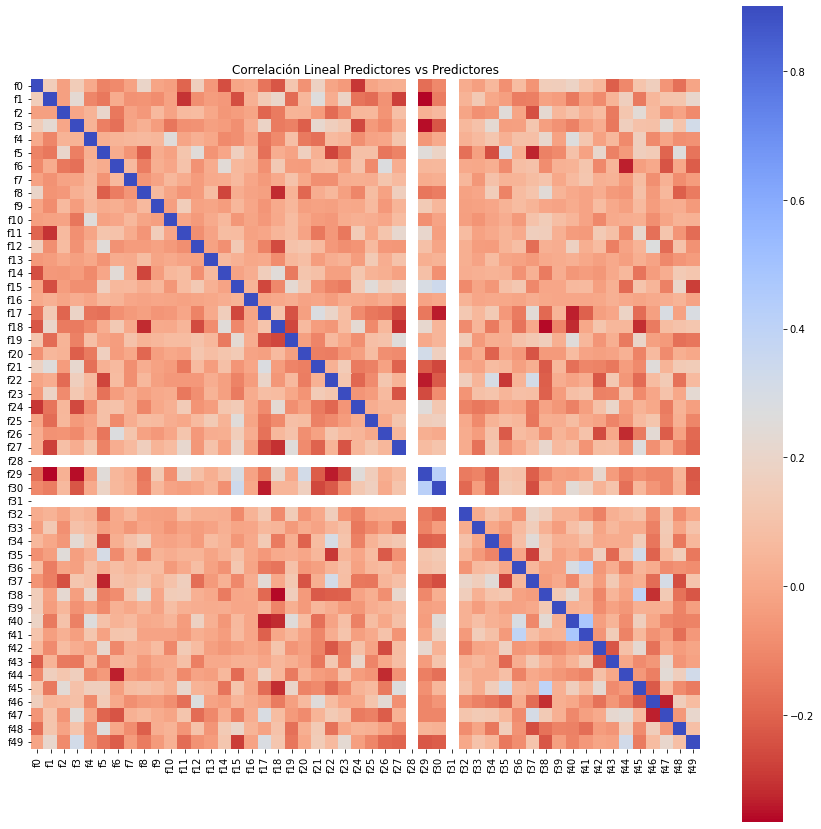

In [22]:
predictor_names = df_train.columns[4:]
n_show = min(len(predictor_names),50)

corrmat = df_train[predictor_names[:n_show]].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="coolwarm_r")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

In [23]:

#sns.set(rc={'figure.figsize':(30,30)})
#sns.pairplot(df_train.iloc[:,[3,4,5,6,7,8,9]],
            #kind = 'scatter',
            #hue = 'class',
            #plot_kws=dict(alpha=0.3),
            #diag_kind=None)

In [24]:
df_train["class"].unique()

array(['_@morsetto_strettoio_', '_@vernice_', '_@cerniera_bandella_',
       '_@staffa_squadretta_', '_@accessori_saldatore_', '_@coltello_',
       '_@collare_', '_@spazzola_', '_@spatola_raschietto_',
       '_@chiodo_rivetto_', '_@pennello_', '_@chiavistello_',
       '_@bancale_cargo_', '_@pinzetta_', '_@estrattore_',
       '_@cazzuola_frattone_'], dtype=object)

In [25]:
np.shape(df_test)

(1683, 259)

In [26]:
np.shape(df_train)

(2524, 261)

# **PCA**

In [27]:
#Utilizamos el método de PCA para proyectar los vectores de palabras
import numpy as np
from sklearn.decomposition import PCA
proyector=PCA(n_components=250)
X_embedded = proyector.fit_transform(vector_train.todense()) #se proyecta el vector de training
X_embedded_test =proyector.transform(vector_test.todense()) #se proyecta el vector de test
X_embedded.shape

(2524, 250)

# Regresor Logístico

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() #se define aquí el regresor logístico

clf.fit(X_embedded, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
train_acc = clf.score(X_embedded, y_train) #este es la accuracy del training
#y_test=clf.predict(X_embedded_test)
#test_acc = clf.score(X_embedded_test, y_test) #acá esta la accuracy del test set
#print("\nTrain/Test Accuracy (via LR)\n")
#print(train_acc,test_acc)
print(train_acc)

0.9762282091917591


In [31]:
y_test=clf.predict(X_embedded_test)
df_sample['class']=y_test
df_sample.to_csv(path+"sample_submission.csv",index=False)#josemiguel.csv